In [1]:
cd /content/drive/MyDrive/ＦX予測

/content/drive/MyDrive/ＦX予測


In [2]:
file_ = "/content/drive/MyDrive/ＦX予測/"

In [3]:
!pip install -q pytorch_lightning

In [4]:
import Method.MakeData as MakeData

In [5]:
margin=2#実際より利益は小さく損失は大きく設定
look_bar_length = 100
get_length = 20
cut_length = 8
visible_length = 12*3#3時間
sudden = 10

In [6]:
data,ans = MakeData.make_data_v3(0, 0.7, look_bar_length, get_length, cut_length, visible_length, sudden)

In [ ]:
#data,ans = MakeData.make_data_v2(0, 0.7, look_bar_length, get_length, cut_length, [1.5,1,0.9,0.8], [2.,4.,6.,7.], visible_length, sudden)

In [10]:
data[0]

array([  1.        ,  18.00060272,   0.        ,   5.0008297 ,
         1.        ,   8.00013542, -30.99918365, -17.99941063,
         1.        ,  17.00043678,  -3.99947166,  -2.99930573,
         0.        ,   3.00049782, -19.99974251,  -2.00033188,
         0.        ,  30.00020981,  -2.00033188,  10.0004673 ,
         1.        ,   5.99980354,  -6.99996948,   0.        ,
         1.        ,  18.99957657,   0.        ,   5.99980354,
         0.        ,   6.00099564,  -3.99947166,  -3.99947166,
         0.        ,  24.00040627,  -9.99927521,   0.        ,
         0.        ,   6.99996948, -12.99977303,  -0.99897385,
         1.        ,  32.99951553,   0.        ,  20.99990845,
         0.        ,   2.99930573,  -8.00013542,  -5.0008297 ,
         0.        ,   2.00033188,  -3.99947166,  -1.99913979,
         0.        ,   2.99930573,  -9.00030136,  -4.00066376,
         1.        ,   0.99897385,  -9.00030136,  -6.00099564,
         0.        ,   3.00049782,  -3.99947166,  -2.00

In [11]:
import Model.BaseModel as Model

In [12]:
import torch
import torch.nn as nn
model = nn.Sequential(
        nn.BatchNorm1d(data.shape[1]),
        nn.Linear(data.shape[1],1000),
        nn.ReLU(),
        nn.Linear(1000,500),
        nn.ReLU(),
        nn.Linear(500,250),
        nn.BatchNorm1d(250),
        nn.ReLU(),
        nn.Linear(250,100),
        nn.ReLU(),
        nn.Linear(100,ans.shape[1])
        )
a = Model.BaseModel(data,ans,model,f"Model1_g{get_length}_c{cut_length}_vl{visible_length}")

INFO:pytorch_lightning.utilities.seed:Global seed set to 0
INFO:pytorch_lightning.utilities.seed:Global seed set to 0


load complete


In [ ]:
#a.load_model("/content/drive/MyDrive/ＦX予測/Model/Model1_g10_c4_vl36_d100.pth")

In [13]:
del(data)
del(ans)

In [14]:
trainer = a.train_model(40)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True, used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 1.1 M 
-------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.215     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [15]:
a.draw_score(get_length-margin, cut_length+margin)

score: 968110
active_acc: 61375
active_loss: 13664
passive_acc: 133737
passive_loss: 31734


In [16]:
a.sudden_score("up")

true_accuracy: 0.7576314556528634
false_accuracy: 0.9883344378486861
y_true_accuracy 0.8944009530292716


In [17]:
a.sudden_score("down")

true_accuracy: 0.760215968344366
false_accuracy: 0.9881200549025854
y_true_accuracy 0.8901831723899017


In [18]:
log=0

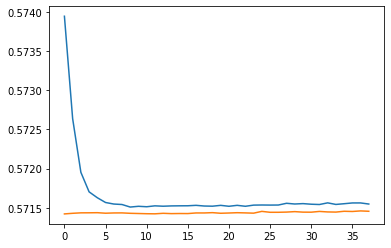

In [19]:
a.graph(log,0)

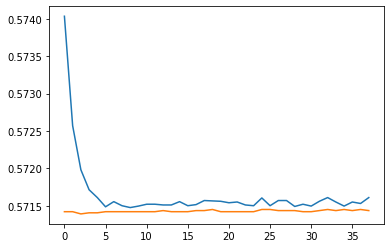

In [20]:
a.graph(log,1)

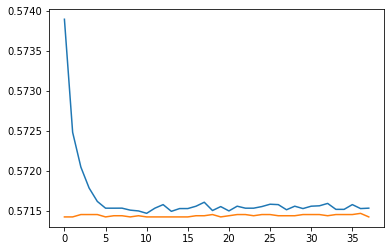

In [21]:
a.graph(log,2)

In [ ]:
#torch.save(a.state_dict(), "model.pt")
a.save_model()
# device = torch.device("cpu")
# a.eval()
# traced_net = torch.jit.trace(a, torch.rand(1,a.input).to(device))
# traced_net.save(Model.save_dir + "C++" + a.root)

In [22]:
dd,aa=MakeData.make_data(0.8, 1, look_bar_length, get_length, cut_length, visible_length, sudden)
a.draw_score2(dd,aa, get_length-margin, cut_length+margin)
a.sudden_score2(dd,aa,"up")
a.sudden_score2(dd,aa,"down")
del(dd)
del(aa)

INFO:pytorch_lightning.utilities.seed:Global seed set to 0


score: -429538
active_acc: 619
active_loss: 44068
passive_acc: 220993
passive_loss: 77808


INFO:pytorch_lightning.utilities.seed:Global seed set to 0


true_accuracy: 0.3203828295271487
false_accuracy: 0.47630618589214113
y_true_accuracy 0.01902248828324997


INFO:pytorch_lightning.utilities.seed:Global seed set to 0


true_accuracy: 0.22283774124374553
false_accuracy: 0.9277180585983581
y_true_accuracy 0.09406706144155698


In [ ]:
dd,aa=MakeData.make_data(0.8, 1, look_bar_length, get_length, cut_length, visible_length, sudden)
a.draw_score2(dd,aa, get_length-margin, cut_length+margin)
del(dd)
del(aa)

Global seed set to 0


score: 1257752
active_acc: 73594
active_loss: 6694
passive_acc: 249596
passive_loss: 13604


In [ ]:
del(a)

In [ ]:
144680/((2022-1999)*0.2)/365

86.17033948779034

In [ ]:
dd = torch.tensor(data, dtype=torch.float32)
aa = torch.tensor(ans, dtype=torch.float32)

In [ ]:
a.eval()
i = 0
print(a(dd[i].unsqueeze(0))[0][4:])
s = nn.Softmax(dim=0)
print(s(a(dd[i].unsqueeze(0))[0][4:]))
print(torch.argmax(torch.sigmoid(a(dd[i].unsqueeze(0))[0][4:])))
print(aa[i][4:])
print(torch.argmax(aa[i][4:]))

tensor([ 0.1064,  0.0028, -0.4696], grad_fn=<SliceBackward0>)
tensor([0.4059, 0.3659, 0.2282], grad_fn=<SoftmaxBackward0>)
tensor(0)
tensor([0., 0., 1.])
tensor(2)


In [ ]:
import numpy as np
a(torch.tensor(np.zeros([1,400],dtype=np.float32)+3,dtype=torch.float32))

tensor([[  28.4914,  -71.4073,   17.9074, -100.5290, -112.8786,  -87.7773,
           -6.7142]], grad_fn=<AddmmBackward0>)